In [2]:
pip install pillow

DEPRECATION: Loading egg at /Users/zhangying/anaconda3/lib/python3.11/site-packages/baidu_aip-4.16.13-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


English Version Monte Carlo

Chinese version


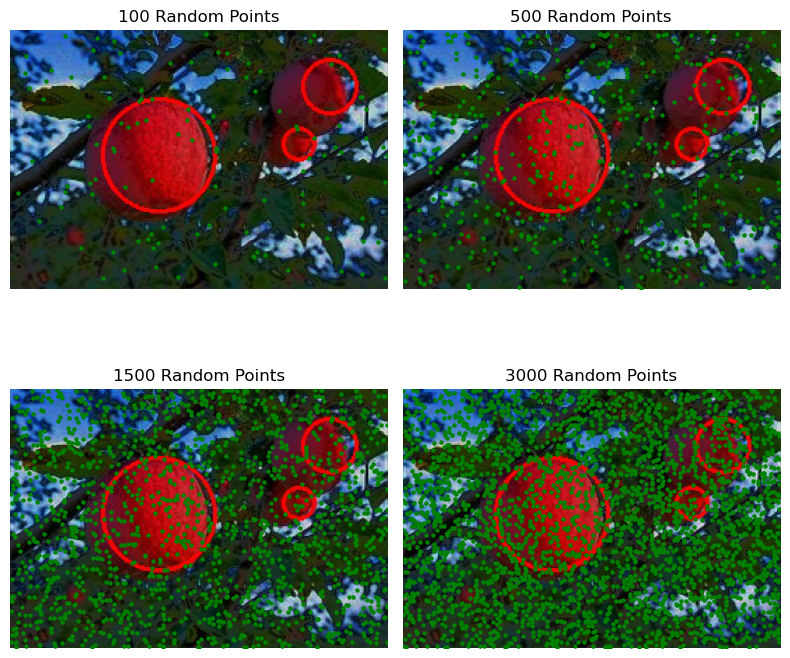

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 读取自己的图片作为背景
custom_background_img = np.array(Image.open("/Users/zhangying/Processed_Image_2.jpg"))
# 创建一个函数来生成图像并添加随机点
def generate_image(base_image, num_points):
    img = np.copy(base_image)  # 创建基于基础图片的副本
    height, width = img.shape

    # 在图像上随机生成指定数量的点
    for _ in range(num_points):
        x, y = np.random.randint(0, width), np.random.randint(0, height)
        img[y, x] = 0  # 在随机位置添加黑色点

    return img

# 生成四个不同数量随机点的图片
num_points_list = [100, 500, 1500, 3000]
images = [generate_image(background_img, num_points) for num_points in num_points_list]

plt.figure(figsize=(8, 8))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    
    # 获取随机点的坐标
    coords = np.argwhere(images[i] == 0)
    
    # 绘制散点图，设置颜色为绿色
    plt.scatter(coords[:, 1], coords[:, 0], c='green', s=5)  # y坐标在前，x坐标在后
    # 显示自定义背景图片
    plt.imshow(custom_background_img, cmap='gray', alpha=1)  # 设置alpha值透明度
    plt.title(f'{num_points_list[i]} Random Points')
    plt.axis('off')  # 关闭坐标轴

plt.tight_layout()
plt.show()